In [65]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

df_submission = pd.read_csv('./submission.csv')
BASE_INPUT_PATH = Path(f'../kaggle/input/optiver-trading-at-the-close')
REVEALED_TARGETS_FILE = Path(f'{BASE_INPUT_PATH}/revealed_targets.csv')
df_revealed_targets = pd.read_csv(REVEALED_TARGETS_FILE)


In [66]:
df_revealed_targets = df_revealed_targets.dropna(subset=['revealed_date_id', 'seconds_in_bucket', 'stock_id'])
df_revealed_targets['revealed_date_id'] = df_revealed_targets['revealed_date_id'].astype(int).astype(str)
df_revealed_targets['seconds_in_bucket'] = df_revealed_targets['seconds_in_bucket'].astype(int).astype(str)
df_revealed_targets['stock_id'] = df_revealed_targets['stock_id'].astype(int).astype(str)  # Converting to int first to remove any decimal points

# Concatenate the columns
df_revealed_targets['row_id'] = df_revealed_targets['revealed_date_id'] + '_' + df_revealed_targets['seconds_in_bucket'] + '_' + df_revealed_targets['stock_id']

In [67]:
df_submission

,row_id,target
0,478_0_0,-0.082399
1,478_0_1,0.281964
2,478_0_2,0.304571
3,478_0_3,-0.079962
4,478_0_4,-0.082477
...,...,...
32995,480_540_195,0.161837
32996,480_540_196,-1.234021
32997,480_540_197,1.458864
32998,480_540_198,0.142796


In [68]:
df_revealed_targets

,stock_id,date_id,seconds_in_bucket,time_id,revealed_target,revealed_date_id,revealed_time_id,row_id
0,0,478,0,26290,-2.310276,477,26235.0,477_0_0
1,1,478,0,26290,-12.850165,477,26235.0,477_0_1
2,2,478,0,26290,-0.439882,477,26235.0,477_0_2
3,3,478,0,26290,7.259846,477,26235.0,477_0_3
4,4,478,0,26290,4.780292,477,26235.0,477_0_4
...,...,...,...,...,...,...,...,...
33103,195,480,540,26400,1.599789,479,26399.0,479_540_195
33104,196,480,540,26400,-8.440018,479,26399.0,479_540_196
33105,197,480,540,26400,5.149841,479,26399.0,479_540_197
33106,198,480,540,26400,-0.249743,479,26399.0,479_540_198


In [69]:
df = pd.merge(df_submission, df_revealed_targets, how='left', on='row_id')
#df = df[['row_id', 'target', 'revealed_target', 'stock_id', 'date_id', 'seconds_in_bucket']]
df = df.rename(columns={'target': 'pred', 'revealed_target': 'target'})
df = df.dropna()
df['score'] = (df['pred'] - df['target']).abs()
df

,row_id,pred,stock_id,date_id,seconds_in_bucket,time_id,target,revealed_date_id,revealed_time_id,score
0,478_0_0,-0.082399,0,479.0,0,26345.0,-5.429983,478,26290.0,5.347584
1,478_0_1,0.281964,1,479.0,0,26345.0,-1.869798,478,26290.0,2.151762
2,478_0_2,0.304571,2,479.0,0,26345.0,-0.090003,478,26290.0,0.394574
3,478_0_3,-0.079962,3,479.0,0,26345.0,-7.609725,478,26290.0,7.529763
4,478_0_4,-0.082477,4,479.0,0,26345.0,-3.290176,478,26290.0,3.207700
...,...,...,...,...,...,...,...,...,...,...
21995,479_540_195,-1.318243,195,480.0,540,26400.0,1.599789,479,26399.0,2.918032
21996,479_540_196,0.682339,196,480.0,540,26400.0,-8.440018,479,26399.0,9.122357
21997,479_540_197,-1.372957,197,480.0,540,26400.0,5.149841,479,26399.0,6.522798
21998,479_540_198,0.874337,198,480.0,540,26400.0,-0.249743,479,26399.0,1.124080


In [70]:
df.to_csv('submission_result.csv', index=False)

In [71]:
scoure = df['score'].mean()
scoure

5.500894667521424

In [72]:
df.describe()

,pred,date_id,time_id,target,revealed_time_id,score
count,2.200000e+04,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000
mean,-7.693715e-10,479.500000,26372.500000,-0.171779,26344.500000,5.500895
std,1.386119e+00,0.500011,27.500625,8.208760,31.753674,6.011004
min,-1.690645e+01,479.000000,26345.000000,-144.379730,26290.000000,0.000718
25%,-7.382412e-01,479.000000,26345.000000,-3.932267,26317.000000,1.787325
50%,-4.428296e-02,479.500000,26372.500000,-0.060201,26344.500000,3.889533
75%,8.017691e-01,480.000000,26400.000000,3.730059,26372.000000,7.255330
max,1.453229e+01,480.000000,26400.000000,77.129600,26399.000000,137.030698


mean: -0.1717789640360909
std: 8.20875985027079
min: -144.37973
max: 77.1296


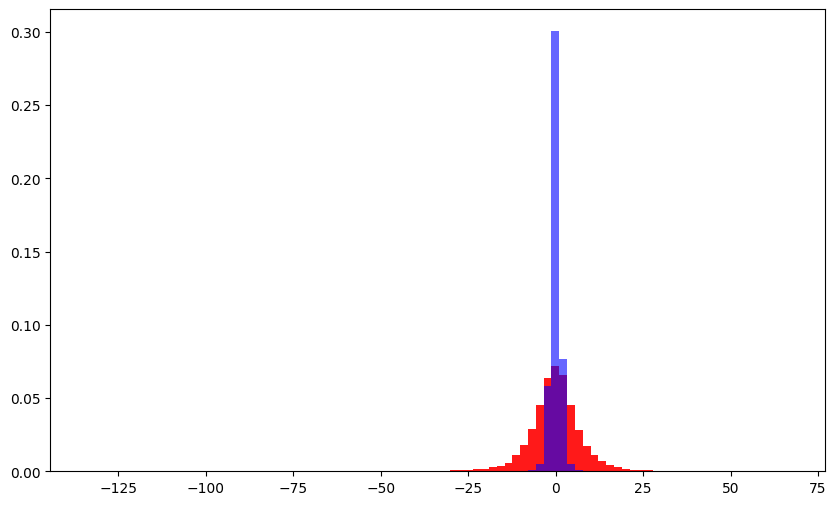

In [73]:
# Analysys
import matplotlib.pyplot as plt
import numpy as np  # Numerical operations

df_target = df['target']
describe = df_target.describe()

# 平均と標準偏差の取得
mean = describe['mean']
std = describe['std']
print(f"mean: {mean}")
print(f"std: {std}")
print(f"min: {describe['min']}")
print(f"max: {describe['max']}")

# グラフの解像度を高めるための設定
plt.figure(figsize=(10, 6))  # グラフのサイズを大きくする
bins = np.linspace(describe['min'], describe['max'], 100)  # ビンの数を増やして細かく分割

plt.hist(df['target'], bins=bins, alpha=0.9, color='red', density=True)
plt.hist(df['pred'], bins=bins, alpha=0.6, color='blue', density=True)

# X軸の範囲を絞る
plt.xlim(describe['min'], describe['max'])

# グラフの表示
plt.show()

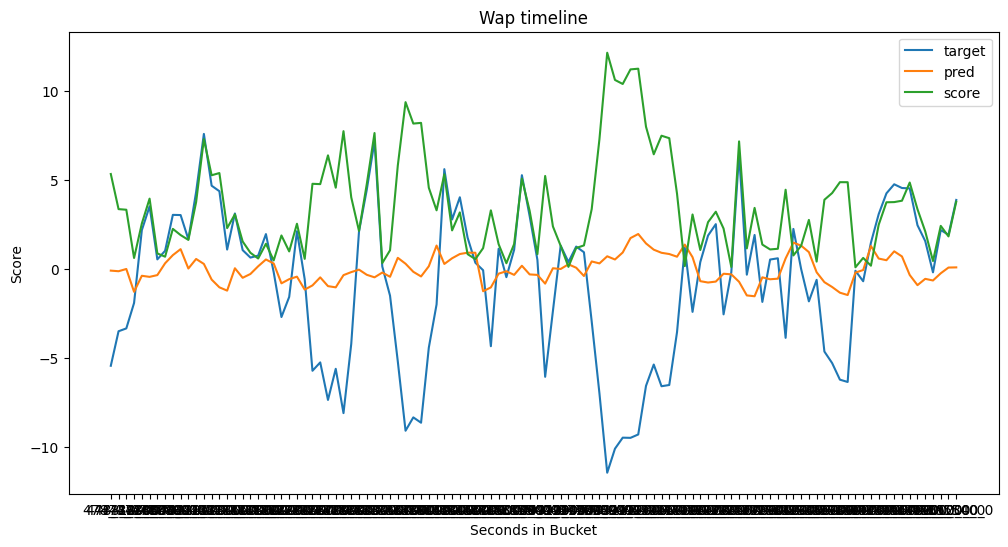

In [74]:
import matplotlib.pyplot as plt

# 特定の stock_id を選択

df_max_diff = df[df['stock_id'] == '100']
df_max_diff

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df_max_diff['row_id'], df_max_diff['target'], label='target')
plt.plot(df_max_diff['row_id'], df_max_diff['pred'], label='pred')
plt.plot(df_max_diff['row_id'], df_max_diff['score'], label='score')

# グラフのタイトルとラベル設定
plt.title(f'Wap timeline')
plt.xlabel('Seconds in Bucket')
plt.ylabel('Score')
plt.legend()

# グラフ表示
plt.show()

In [75]:
df['score'].describe()

count    22000.000000
mean         5.500895
std          6.011004
min          0.000718
25%          1.787325
50%          3.889533
75%          7.255330
max        137.030698
Name: score, dtype: float64

In [76]:
y_min, y_max = -64, 64

# 📉 Define a function to adjust prices based on volumes
def zero_sum(prices, volumes):
    std_error = np.sqrt(volumes)  # 🧮 Calculate standard error based on volumes
    step = np.sum(prices) / np.sum(std_error)  # 🧮 Calculate the step size based on prices and standard error
    out = prices + 0.1 - std_error * step  # 💰 Adjust prices by subtracting the standardized step size
    return out

def zero_clip(df, predictions):
    # Adjust the predictions based on the order book imbalance
    # 𝐵𝑖𝑑𝑃𝑟𝑖𝑐𝑒∗𝐴𝑠𝑘𝑆𝑖𝑧𝑒+𝐴𝑠𝑘𝑃𝑟𝑖𝑐𝑒∗𝐵𝑖𝑑𝑆𝑖𝑧𝑒𝐵𝑖𝑑𝑆𝑖𝑧𝑒
    zerosum_predictions = zero_sum(predictions, df['bid_size'] + df['ask_size'])
    clipped_predictions = np.clip(zerosum_predictions, y_min, y_max)
    clipped_predictions.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
    clipped_predictions = clipped_predictions.astype('float64').values  
    return clipped_predictions

df_rescaled = df.copy()
df_rescaled['re_scaled_pred'] = zero_clip(df_rescaled, df_rescaled['pred'])
df_rescaled['re_scaled_score'] = (df_rescaled['re_scaled_pred'] - df_rescaled['target']).abs()
df_rescaled_s = df_rescaled[['row_id', 'stock_id', 'pred', 're_scaled_pred', 'target', 'score', 're_scaled_score']]
df_rescaled_s

KeyError: 'bid_size'